# 2021/12/24
# 本代码绘制version1.0 中的fig10
# 内容为no——indo实验中的925+prect

In [93]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import sys
import matplotlib as mpl

sys.path.append("/home/sun/mycode/module/")
from module_sun import *

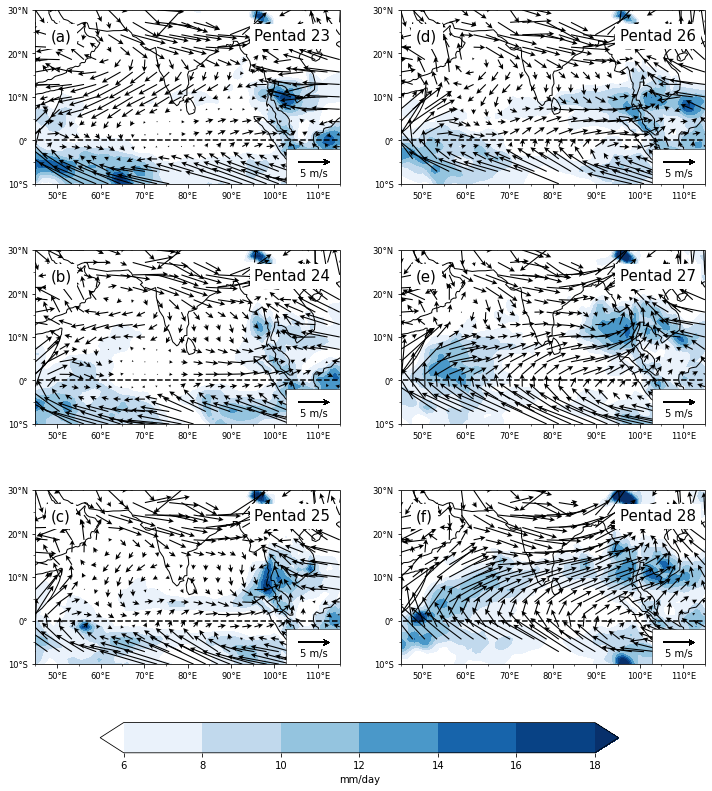

In [101]:
path  =  "/home/sun/qomo-data/zhuang_plev/pentad_average/"
level =  925
lon_slice  =  slice(40,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  45,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

f1 =  xr.open_dataset(path+"plev_id_U.nc").sel(lev=level,lon=lon_slice,lat=lat_slice)   
f2 =  xr.open_dataset(path+"plev_id_V.nc").sel(lev=level,lon=lon_slice,lat=lat_slice) 
f3 =  xr.open_dataset(path+"plev_pentad_id_prect.nc").sel(lon=lon_slice,lat=lat_slice)

f1.u_pen.data[abs(f1.u_pen.data)>8]  =  np.nan
f1.u_pen.data[abs(f1.u_pen.data)>8]  =  np.nan
f2.v_pen.data[abs(f1.u_pen.data)>8]  =  np.nan
f2.v_pen.data[abs(f1.u_pen.data)>8]  =  np.nan

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

dates  =  [23,24,25,26,27,28] #总共6张图
number =  ["a","b","c","d","e","f"]
props  = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(12,14))
spec1   =  fig1.add_gridspec(nrows=3,ncols=2)

viridis = cm.get_cmap('Blues', 16)
newcolors = viridis(np.linspace(0, 1, 16))
newcmp = ListedColormap(newcolors)
newcmp.set_under('white')
#newcmp.set_over('brown')

j = 0
    
for col in range(2):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im  =  ax.contourf(f3.lon,f3.lat,f3.prect_pen[dates[j]-1,:],levels=np.arange(6,20,2),cmap=newcmp,alpha=1,extend='both')
            q   =  ax.quiver(f1.lon, f1.lat, f1.u_pen.data[dates[j]-1,:], f2.v_pen.data[dates[j]-1,:], 
                            regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
                            scale_units='xy', scale=0.7,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                            units='xy', width=0.25,
                            transform=proj,
                            color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5)
            ax.text(0.72,0.825,"Pentad "+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
            
            rect = mpl.patches.Rectangle((0.825, 0), 0.175, 0.2, transform=ax.transAxes,    # 这个能辟出来一块区域，第一个参数是最左下角点的坐标，后面是矩形的长和宽
                                        fc='white', ec='k', lw=0.5, zorder=1.1
                                        )
            ax.add_patch(rect)
            
            qk = ax.quiverkey(q, X=0.915, Y=0.125, U=5,
                                label=f'{5} m/s', labelpos='S', labelsep=0.08,)
        
            j += 1


fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='mm/day')


plt.savefig("/home/sun/paint/lunwen/version1.0/fig10_925_noid_vector_prect.pdf", bbox_inches='tight', dpi=300)
plt.show()

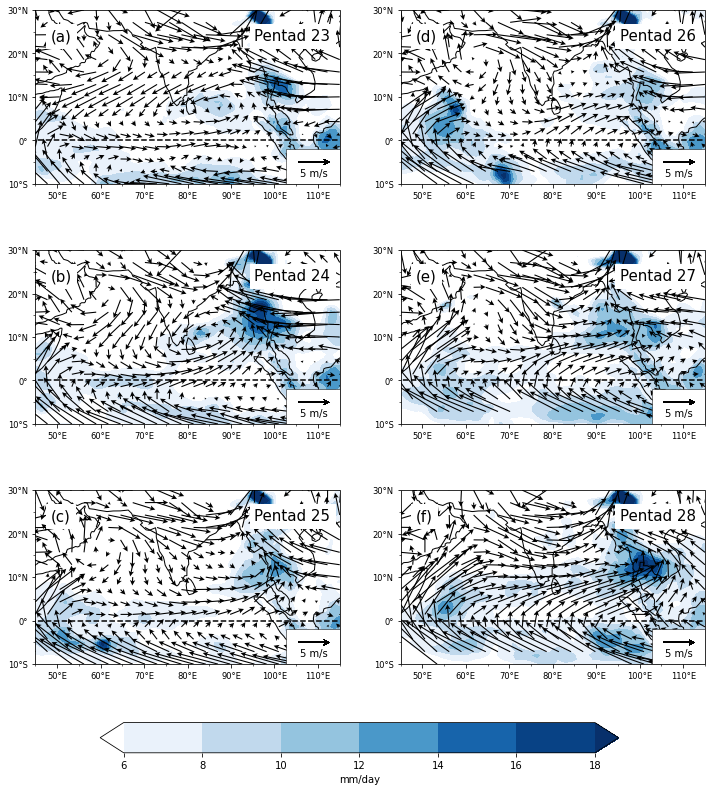

In [102]:
path  =  "/home/sun/qomo-data/zhuang_plev/pentad_average/"

f1 =  xr.open_dataset(path+"plev_icid_U.nc").sel(lev=level,lon=lon_slice,lat=lat_slice)   
f2 =  xr.open_dataset(path+"plev_icid_V.nc").sel(lev=level,lon=lon_slice,lat=lat_slice) 
f3 =  xr.open_dataset(path+"plev_pentad_icid_prect.nc").sel(lon=lon_slice,lat=lat_slice)

f1.u_pen.data[abs(f1.u_pen.data)>8]  =  np.nan
f1.u_pen.data[abs(f1.u_pen.data)>8]  =  np.nan
f2.v_pen.data[abs(f1.u_pen.data)>8]  =  np.nan
f2.v_pen.data[abs(f1.u_pen.data)>8]  =  np.nan

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

dates  =  [23,24,25,26,27,28] #总共6张图
number =  ["a","b","c","d","e","f"]
props  = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(12,14))
spec1   =  fig1.add_gridspec(nrows=3,ncols=2)

viridis = cm.get_cmap('Blues', 16)
newcolors = viridis(np.linspace(0, 1, 16))
newcmp = ListedColormap(newcolors)
newcmp.set_under('white')
#newcmp.set_over('brown')

j = 0
    
for col in range(2):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im  =  ax.contourf(f3.lon,f3.lat,f3.prect_pen[dates[j]-1,:],levels=np.arange(6,20,2),cmap=newcmp,alpha=1,extend='both')
            q   =  ax.quiver(f1.lon, f1.lat, f1.u_pen.data[dates[j]-1,:], f2.v_pen.data[dates[j]-1,:], 
                            regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
                            scale_units='xy', scale=0.7,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                            units='xy', width=0.25,
                            transform=proj,
                            color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5)
            ax.text(0.72,0.825,"Pentad "+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
            
            rect = mpl.patches.Rectangle((0.825, 0), 0.175, 0.2, transform=ax.transAxes,    # 这个能辟出来一块区域，第一个参数是最左下角点的坐标，后面是矩形的长和宽
                                        fc='white', ec='k', lw=0.5, zorder=1.1
                                        )
            ax.add_patch(rect)
            
            qk = ax.quiverkey(q, X=0.915, Y=0.125, U=5,
                                label=f'{5} m/s', labelpos='S', labelsep=0.08,)
        
            j += 1


fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='mm/day')


plt.savefig("/home/sun/paint/lunwen/version1.0/fig10_925_noicid_vector_prect.pdf", bbox_inches='tight', dpi=300)
plt.show()

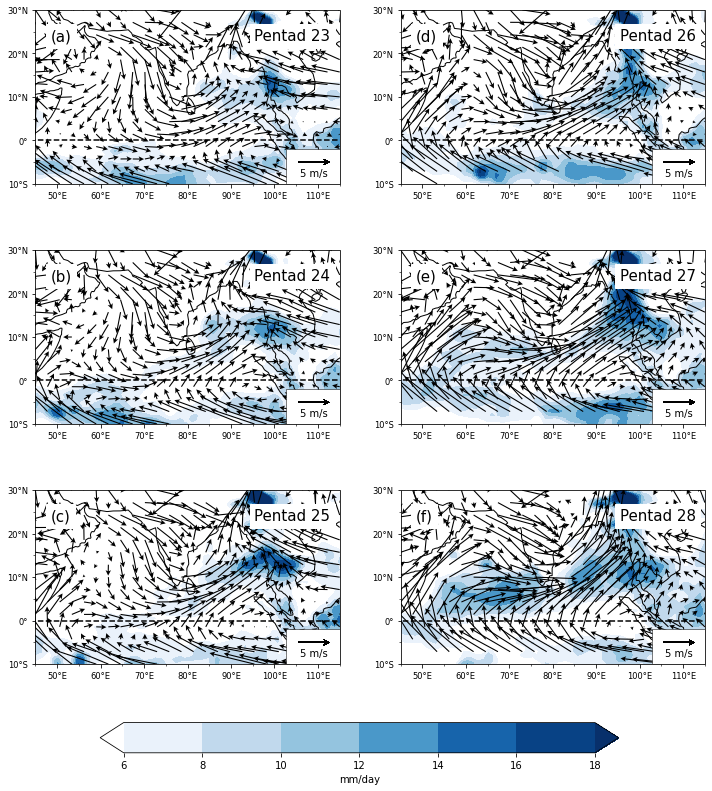

In [103]:
path  =  "/home/sun/qomo-data/zhuang_plev/pentad_average/"

f1 =  xr.open_dataset(path+"plev_ic_U.nc").sel(lev=level,lon=lon_slice,lat=lat_slice)   
f2 =  xr.open_dataset(path+"plev_ic_V.nc").sel(lev=level,lon=lon_slice,lat=lat_slice) 
f3 =  xr.open_dataset(path+"plev_pentad_ic_prect.nc").sel(lon=lon_slice,lat=lat_slice)

f1.u_pen.data[abs(f1.u_pen.data)>8]  =  np.nan
f1.u_pen.data[abs(f1.u_pen.data)>8]  =  np.nan
f2.v_pen.data[abs(f1.u_pen.data)>8]  =  np.nan
f2.v_pen.data[abs(f1.u_pen.data)>8]  =  np.nan

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

dates  =  [23,24,25,26,27,28] #总共6张图
number =  ["a","b","c","d","e","f"]
props  = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(12,14))
spec1   =  fig1.add_gridspec(nrows=3,ncols=2)

viridis = cm.get_cmap('Blues', 16)
newcolors = viridis(np.linspace(0, 1, 16))
newcmp = ListedColormap(newcolors)
newcmp.set_under('white')
#newcmp.set_over('brown')

j = 0
    
for col in range(2):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im  =  ax.contourf(f3.lon,f3.lat,f3.prect_pen[dates[j]-1,:],levels=np.arange(6,20,2),cmap=newcmp,alpha=1,extend='both')
            q   =  ax.quiver(f1.lon, f1.lat, f1.u_pen.data[dates[j]-1,:], f2.v_pen.data[dates[j]-1,:], 
                            regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
                            scale_units='xy', scale=0.7,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                            units='xy', width=0.25,
                            transform=proj,
                            color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5)
            ax.text(0.72,0.825,"Pentad "+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
            
            rect = mpl.patches.Rectangle((0.825, 0), 0.175, 0.2, transform=ax.transAxes,    # 这个能辟出来一块区域，第一个参数是最左下角点的坐标，后面是矩形的长和宽
                                        fc='white', ec='k', lw=0.5, zorder=1.1
                                        )
            ax.add_patch(rect)
            
            qk = ax.quiverkey(q, X=0.915, Y=0.125, U=5,
                                label=f'{5} m/s', labelpos='S', labelsep=0.08,)
        
            j += 1


fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='mm/day')


plt.savefig("/home/sun/paint/lunwen/version1.0/fig10_925_noic_vector_prect.pdf", bbox_inches='tight', dpi=300)
plt.show()

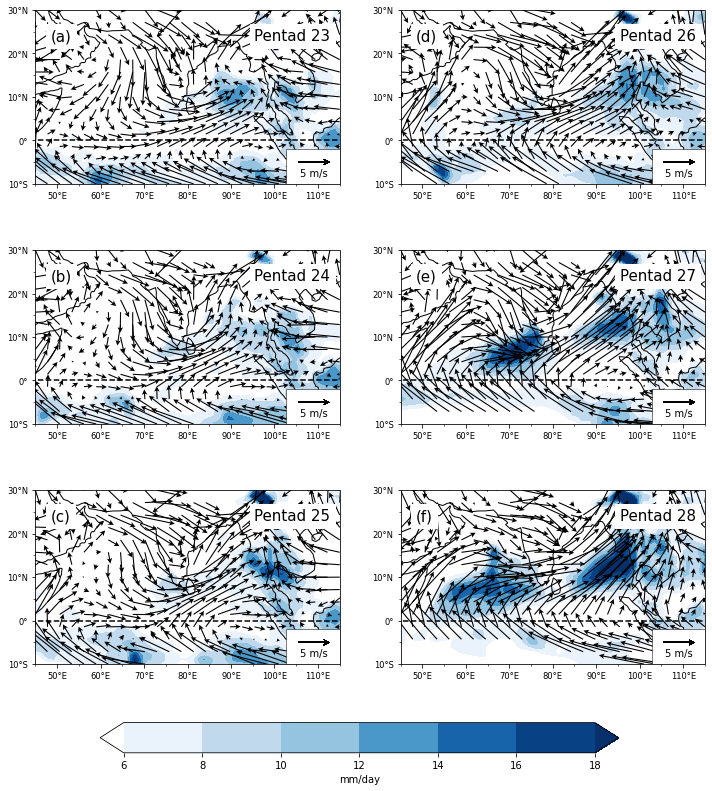

In [104]:
path  =  "/home/sun/qomo-data/zhuang_plev/pentad_average/"

f1 =  xr.open_dataset(path+"plev_con_U.nc").sel(lev=level,lon=lon_slice,lat=lat_slice)   
f2 =  xr.open_dataset(path+"plev_con_V.nc").sel(lev=level,lon=lon_slice,lat=lat_slice) 
f3 =  xr.open_dataset(path+"plev_pentad_con_prect.nc").sel(lon=lon_slice,lat=lat_slice)

f1.u_pen.data[abs(f1.u_pen.data)>8]  =  np.nan
f1.u_pen.data[abs(f1.u_pen.data)>8]  =  np.nan
f2.v_pen.data[abs(f1.u_pen.data)>8]  =  np.nan
f2.v_pen.data[abs(f1.u_pen.data)>8]  =  np.nan

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

dates  =  [23,24,25,26,27,28] #总共6张图
number =  ["a","b","c","d","e","f"]
props  = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(12,14))
spec1   =  fig1.add_gridspec(nrows=3,ncols=2)

viridis = cm.get_cmap('Blues', 16)
newcolors = viridis(np.linspace(0, 1, 16))
newcmp = ListedColormap(newcolors)
newcmp.set_under('white')
#newcmp.set_over('brown')

j = 0
    
for col in range(2):
    for row in range(3):
            ax = fig1.add_subplot(spec1[row,col],projection=proj)
            ax.coastlines(resolution='110m',lw=1)
            # 设置经纬度刻度.
            set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
            ax.set_extent(extent, crs=proj)
            
            ax.plot([40,120],[0,0],'k--')
            im  =  ax.contourf(f3.lon,f3.lat,f3.prect_pen[dates[j]-1,:],levels=np.arange(6,20,2),cmap=newcmp,alpha=1,extend='both')
            q   =  ax.quiver(f1.lon, f1.lat, f1.u_pen.data[dates[j]-1,:], f2.v_pen.data[dates[j]-1,:], 
                            regrid_shape=15, angles='uv',   # regrid_shape这个参数越小，是两门就越稀疏
                            scale_units='xy', scale=0.7,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                            units='xy', width=0.25,
                            transform=proj,
                            color='k',linewidth=1.2,headlength = 5, headaxislength = 4, headwidth = 5)
            ax.text(0.72,0.825,"Pentad "+str(dates[j]),transform=ax.transAxes,bbox=props,fontsize=15)
            ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
            
            rect = mpl.patches.Rectangle((0.825, 0), 0.175, 0.2, transform=ax.transAxes,    # 这个能辟出来一块区域，第一个参数是最左下角点的坐标，后面是矩形的长和宽
                                        fc='white', ec='k', lw=0.5, zorder=1.1
                                        )
            ax.add_patch(rect)
            
            qk = ax.quiverkey(q, X=0.915, Y=0.125, U=5,
                                label=f'{5} m/s', labelpos='S', labelsep=0.08,)
        
            j += 1


fig1.subplots_adjust(top=0.8) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal',label='mm/day')


plt.savefig("/home/sun/paint/lunwen/version1.0/fig10_925_con_vector_prect.pdf", bbox_inches='tight', dpi=300)
plt.show()